<h1><center>Case Study - Scotia</center></h1>

# Exploratory Data Analysis

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [78]:
# loading df_cleaned and resetting Dtypes
df = pd.read_csv("df_cleaned.csv")

|Field     |Description|
|:-------------|-----  |
|Attrition_Flag         |Flag to indicate customer attrition    |
|Customer_Age     |Customer Age    |
|Gender    |Gender     |
|Dependent_count     |Number of customer dependants     |
|Education_Level    |Education level     |
|Marital_Status     |Marital Status     |
|Income_Category     |Customer Income Category     |
|Card_Category  |Type of credit Card     |
|Months_on_book    |Time (months) with the bank     |
|Total_Relationship_Count    |Number of accounts/products the customers has with the bank     |
|Months_Inactive_12_mon  |Months of inactivity in the last 12 months     |
|Contacts_Count_12_mon  |Marketing Campaigns where the customer was reached out     |
|Credit_Limit  |Limit of Credit on the Credit card     |
|Avg_Total_Revolving_Bal  |The balance that carries over from one month to the next on the credit card     |
|Avg_Utilization_Ratio  |It's how much the customers owe divided by their credit limit     |
|Total_Trans_Amt  |Total Amount of transactions     |
|Total_Amt_Chng_Q4_Q1  |Quarter over Quarter change in the amounts of charges in the credit card     |
|Increased_Amt_Chng_Q4_Q1 |Boolean - 1 if positive / growth|
|Total_Trans_Ct  |Number of transactions     |
|Total_Ct_Chng_Q4_Q1  |Quarter over Quarter transactions count variation     |
|Increased_Ct_Chng_Q4_Q1 |Boolean - 1 if positive / growth|
|Purchase_Weight |Amount of transactions divided by Number of transactions|



First, understanding the number of customers who left and remained:

In [79]:
count_ativo = len(df[df['Attrition_Flag']==0]) # counting active customers
count_n_ativo = len(df[df['Attrition_Flag']==1]) # counting non-active customers
pct_ativo = (count_ativo/(count_ativo+count_n_ativo))*100 
pct_n_ativo = (count_n_ativo/(count_ativo+count_n_ativo))*100

print(f"percentage of active customers is: {pct_ativo}%")
print(f"percentage of customers who left is: {pct_n_ativo}%")

percentage of active customers is: 83.934037720944%
percentage of customers who left is: 16.065962279055988%


The classes are unbalanced and the *ativo/n_ativos** ratio is **84/16**.

## Distributions

Understanding the distributions of numerical features:

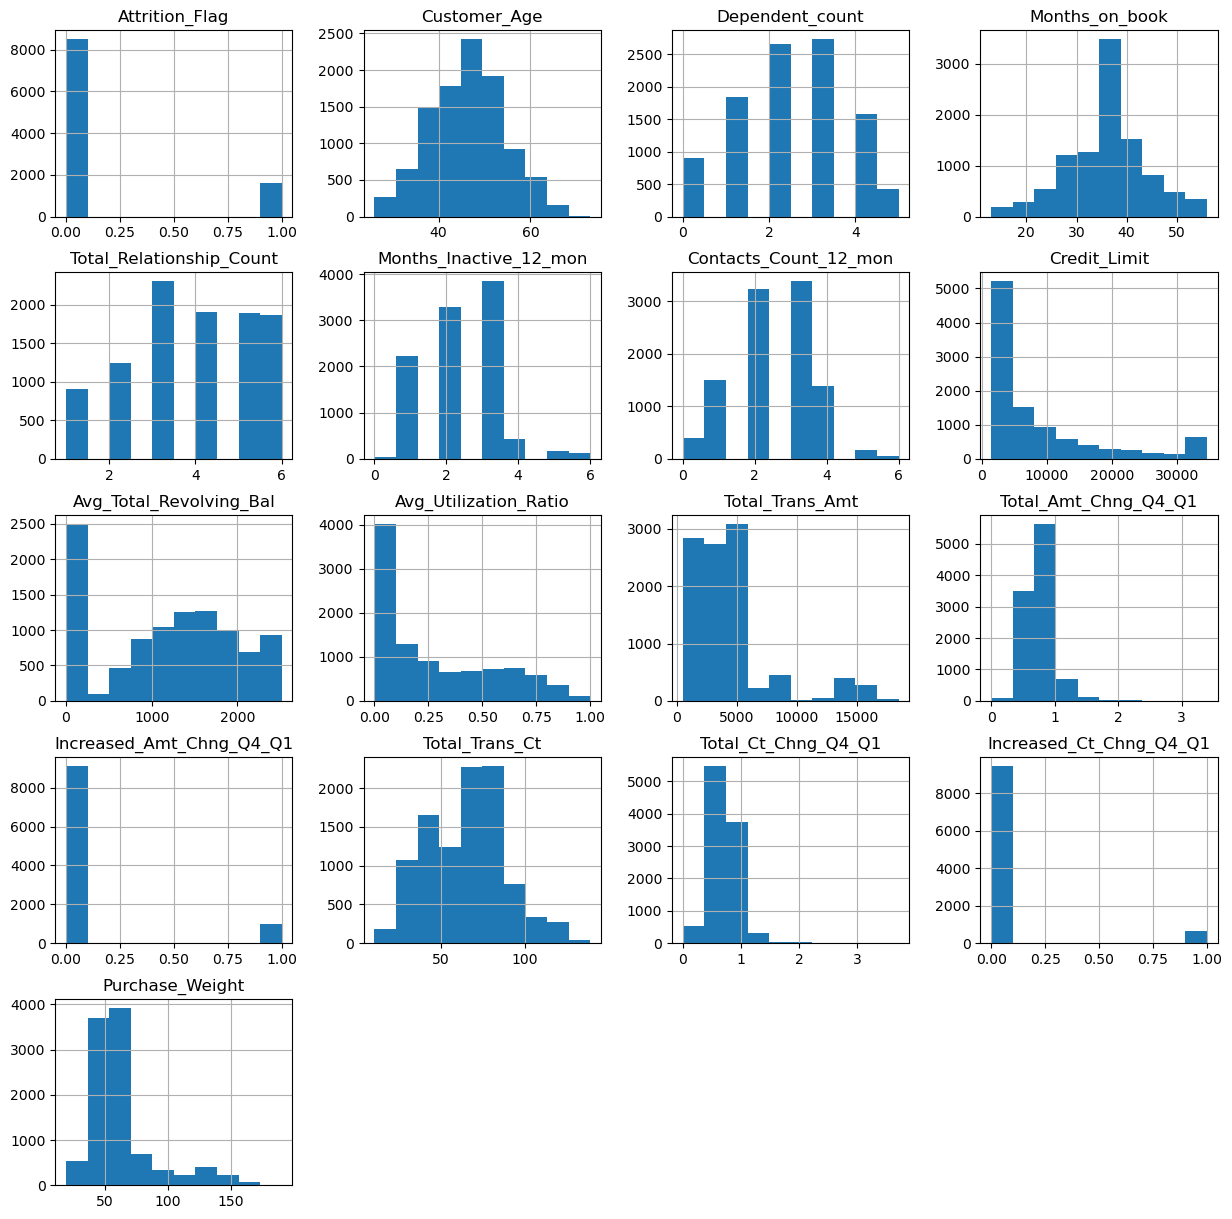

In [80]:
df[['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Increased_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Increased_Ct_Chng_Q4_Q1', 'Purchase_Weight']].hist(figsize=(15,15));

#### Comments:

- percentage of customers who left is: 16.065962279055988% (*is it high? check benchmarking*)
- amount and count of transactions decreased QoQ
- most of avg credit utilization ratio are lower than 1/4.


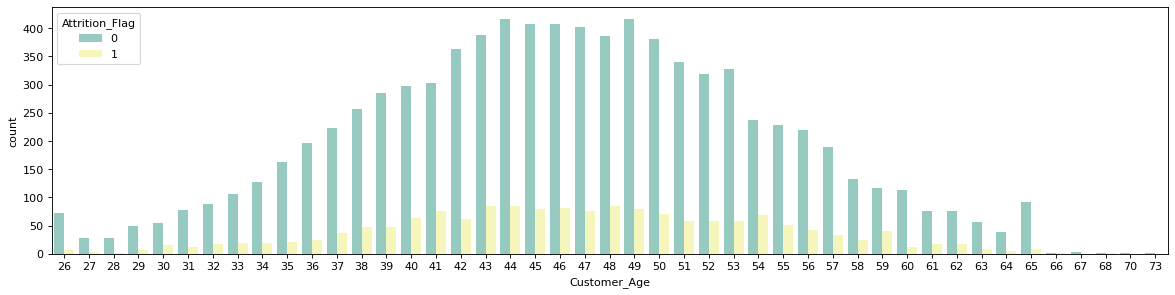

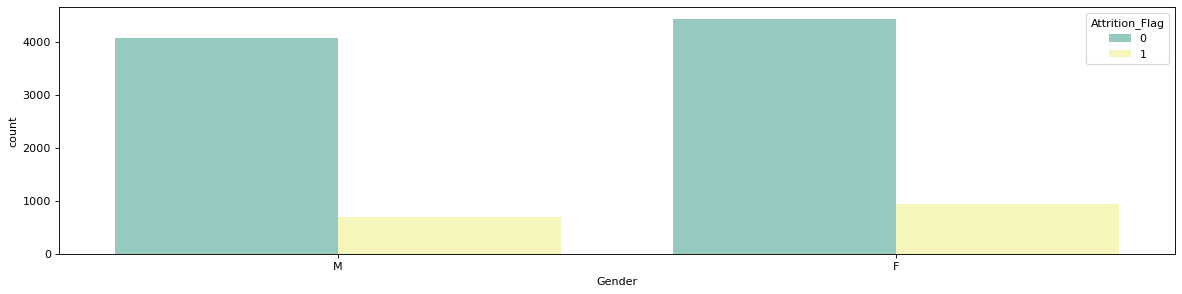

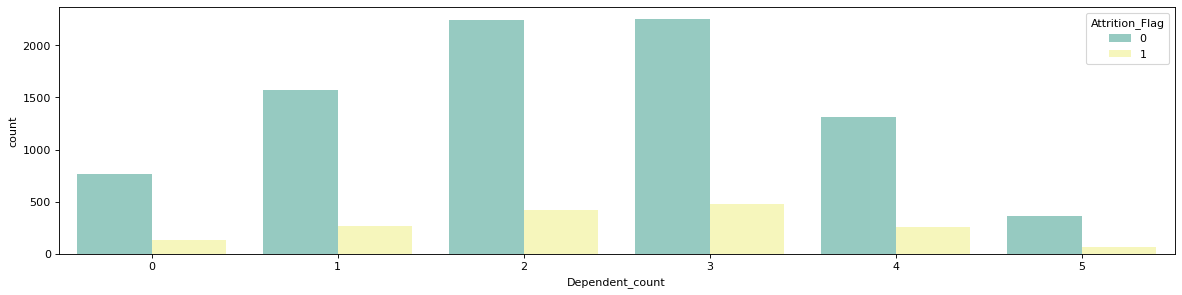

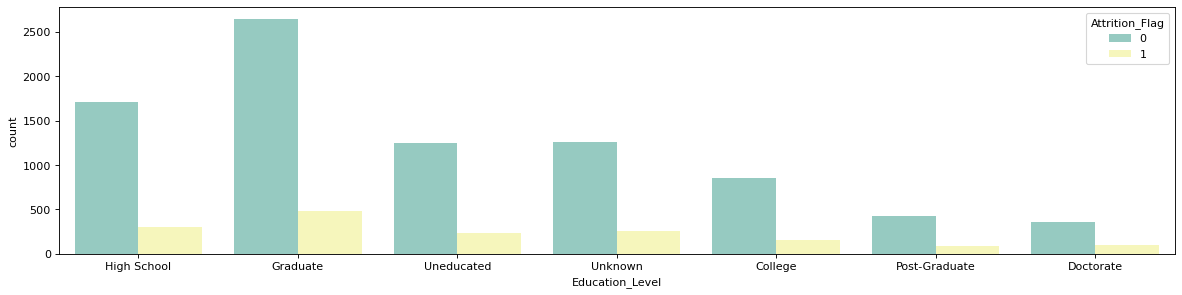

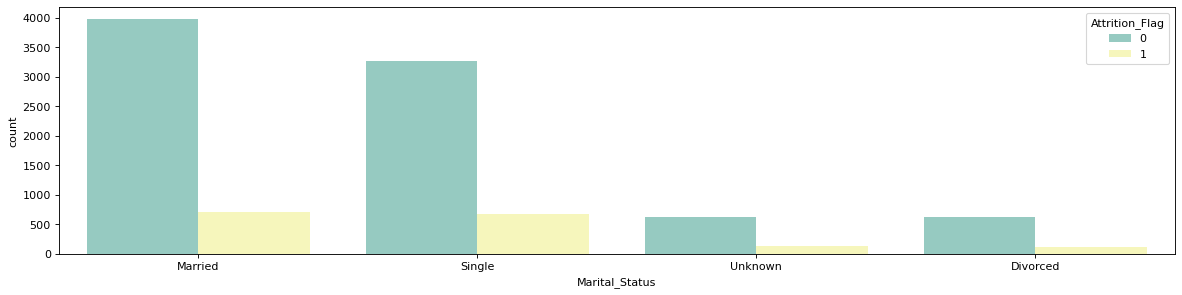

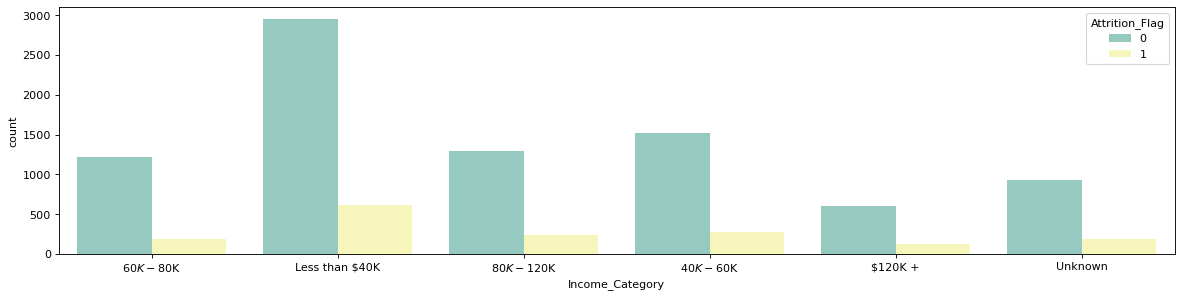

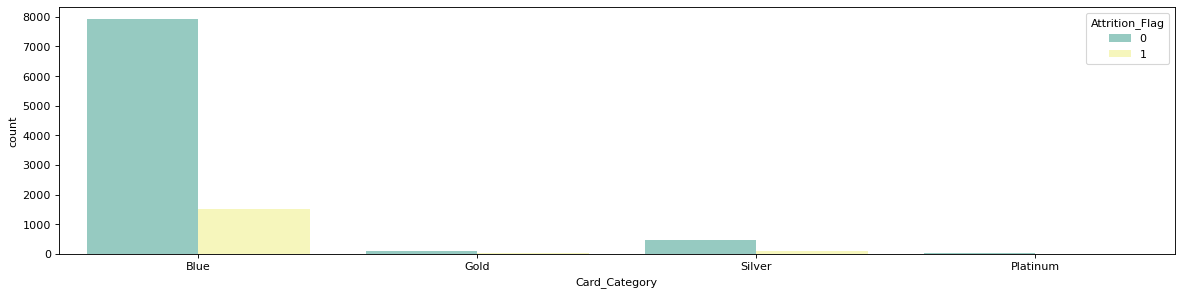

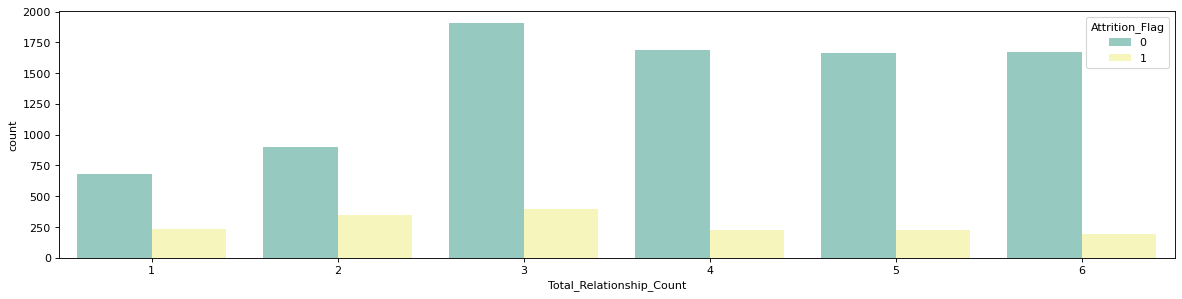

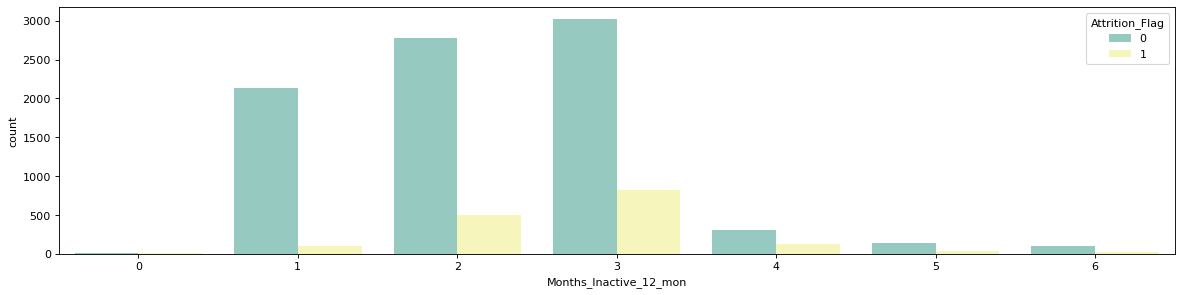

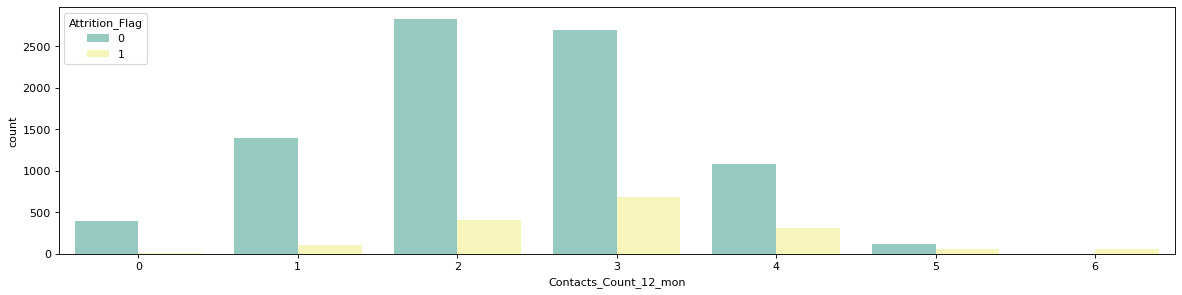

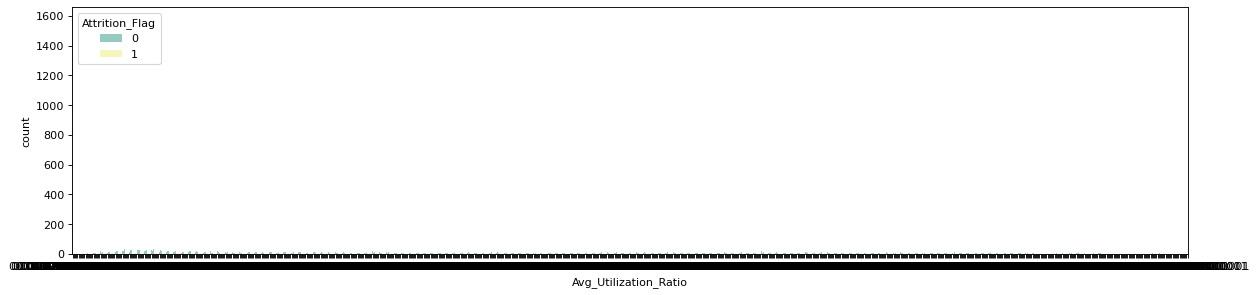

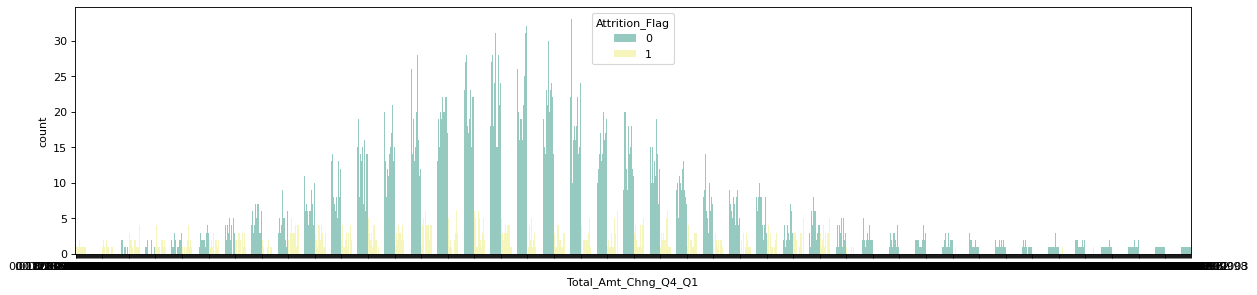

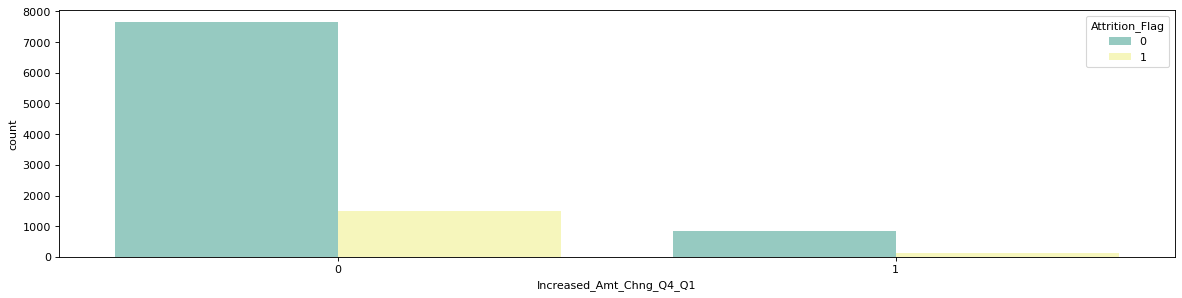

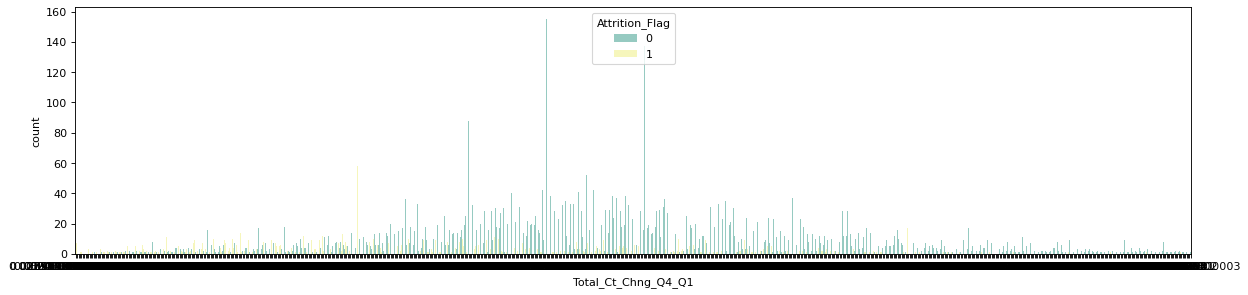

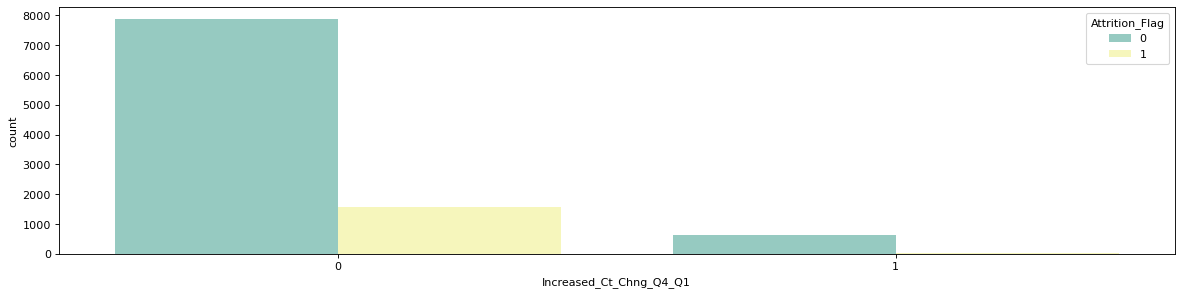

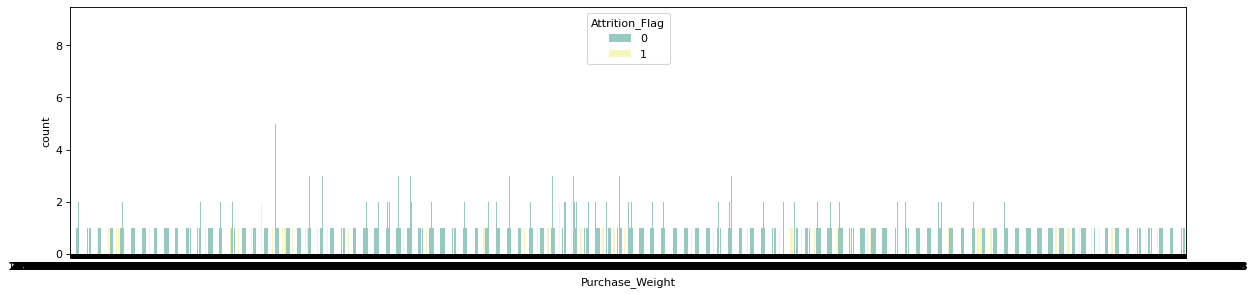

In [81]:
# creating a loop through all features (except id and independent variable 'ativo_m1' - check relations

features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 
            'Increased_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Increased_Ct_Chng_Q4_Q1', 'Purchase_Weight']

for f in features:
    figure(figsize=(18, 4), dpi=80)
    sns.countplot(x = f, data = df, palette = 'Set3', hue = 'Attrition_Flag')
    plt.show()

#### Comments:

- the less relationship count (products/accounts), the greater the proportion of churn (?) - "Barrier to Exit"
- check percentage instead of whole numbers on PowerBI


## Correlations

Understand if there are linear correlations between attributes:

Checking with heatmap:

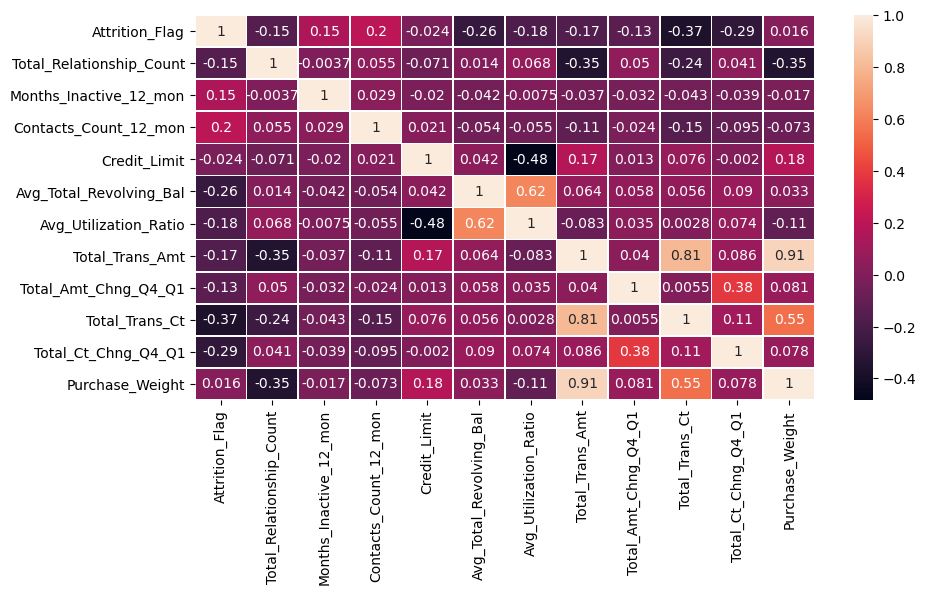

In [82]:
features = ['Attrition_Flag','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Credit_Limit', 'Avg_Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 
            'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1','Purchase_Weight']

fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

cor = df[features].corr()
sns.heatmap(cor, annot=True, fmt=".2g", linewidths=0.5);

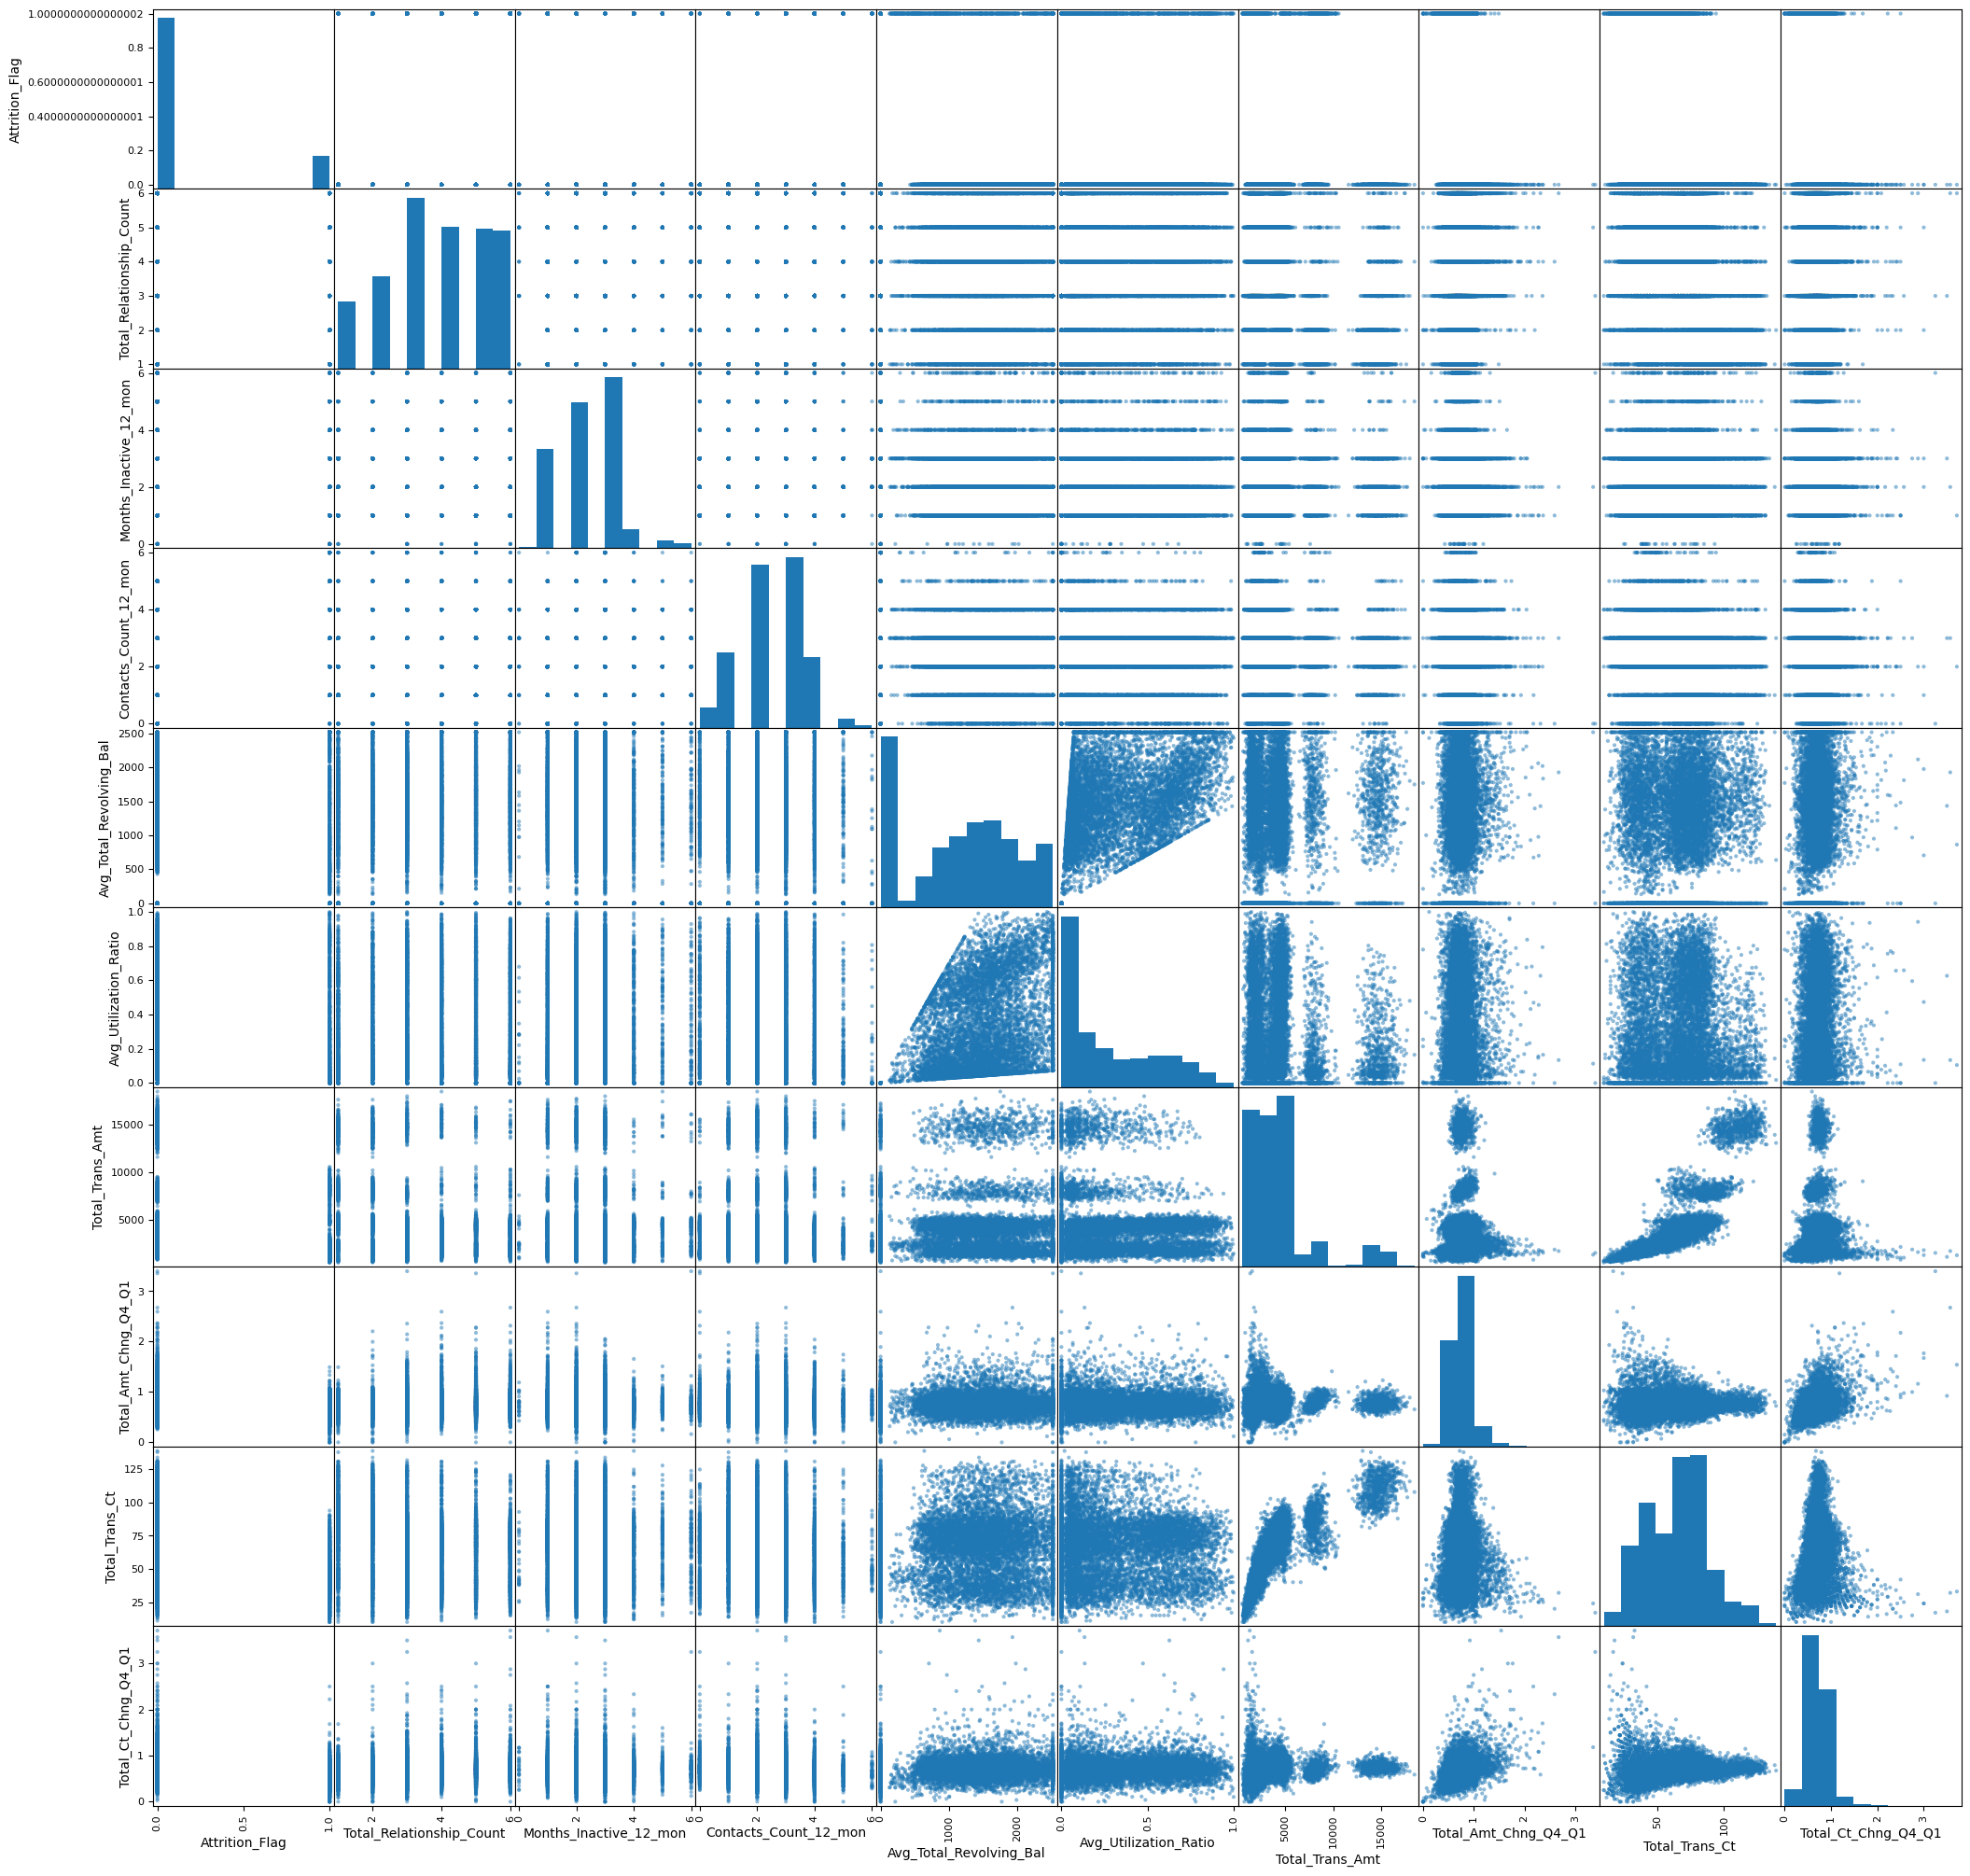

In [83]:
# returns a scatter-type matrix relating the columns with numeric data to each other
features = ['Attrition_Flag',
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Total_Revolving_Bal', 
            'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

pd.plotting.scatter_matrix(df[features], figsize=(25,25));

#### Comments:

- the higher the total revolving balance, the higher the credit utilization rate - but not totally correlated


Separating the dataframe into different groups of only clients who left (df0) and only clients who remained (df1) at the broker, to run the scatter matrix again:

In [84]:
df0 = df.loc[(df.Attrition_Flag == 0)]
df1 = df.loc[(df.Attrition_Flag == 1)]

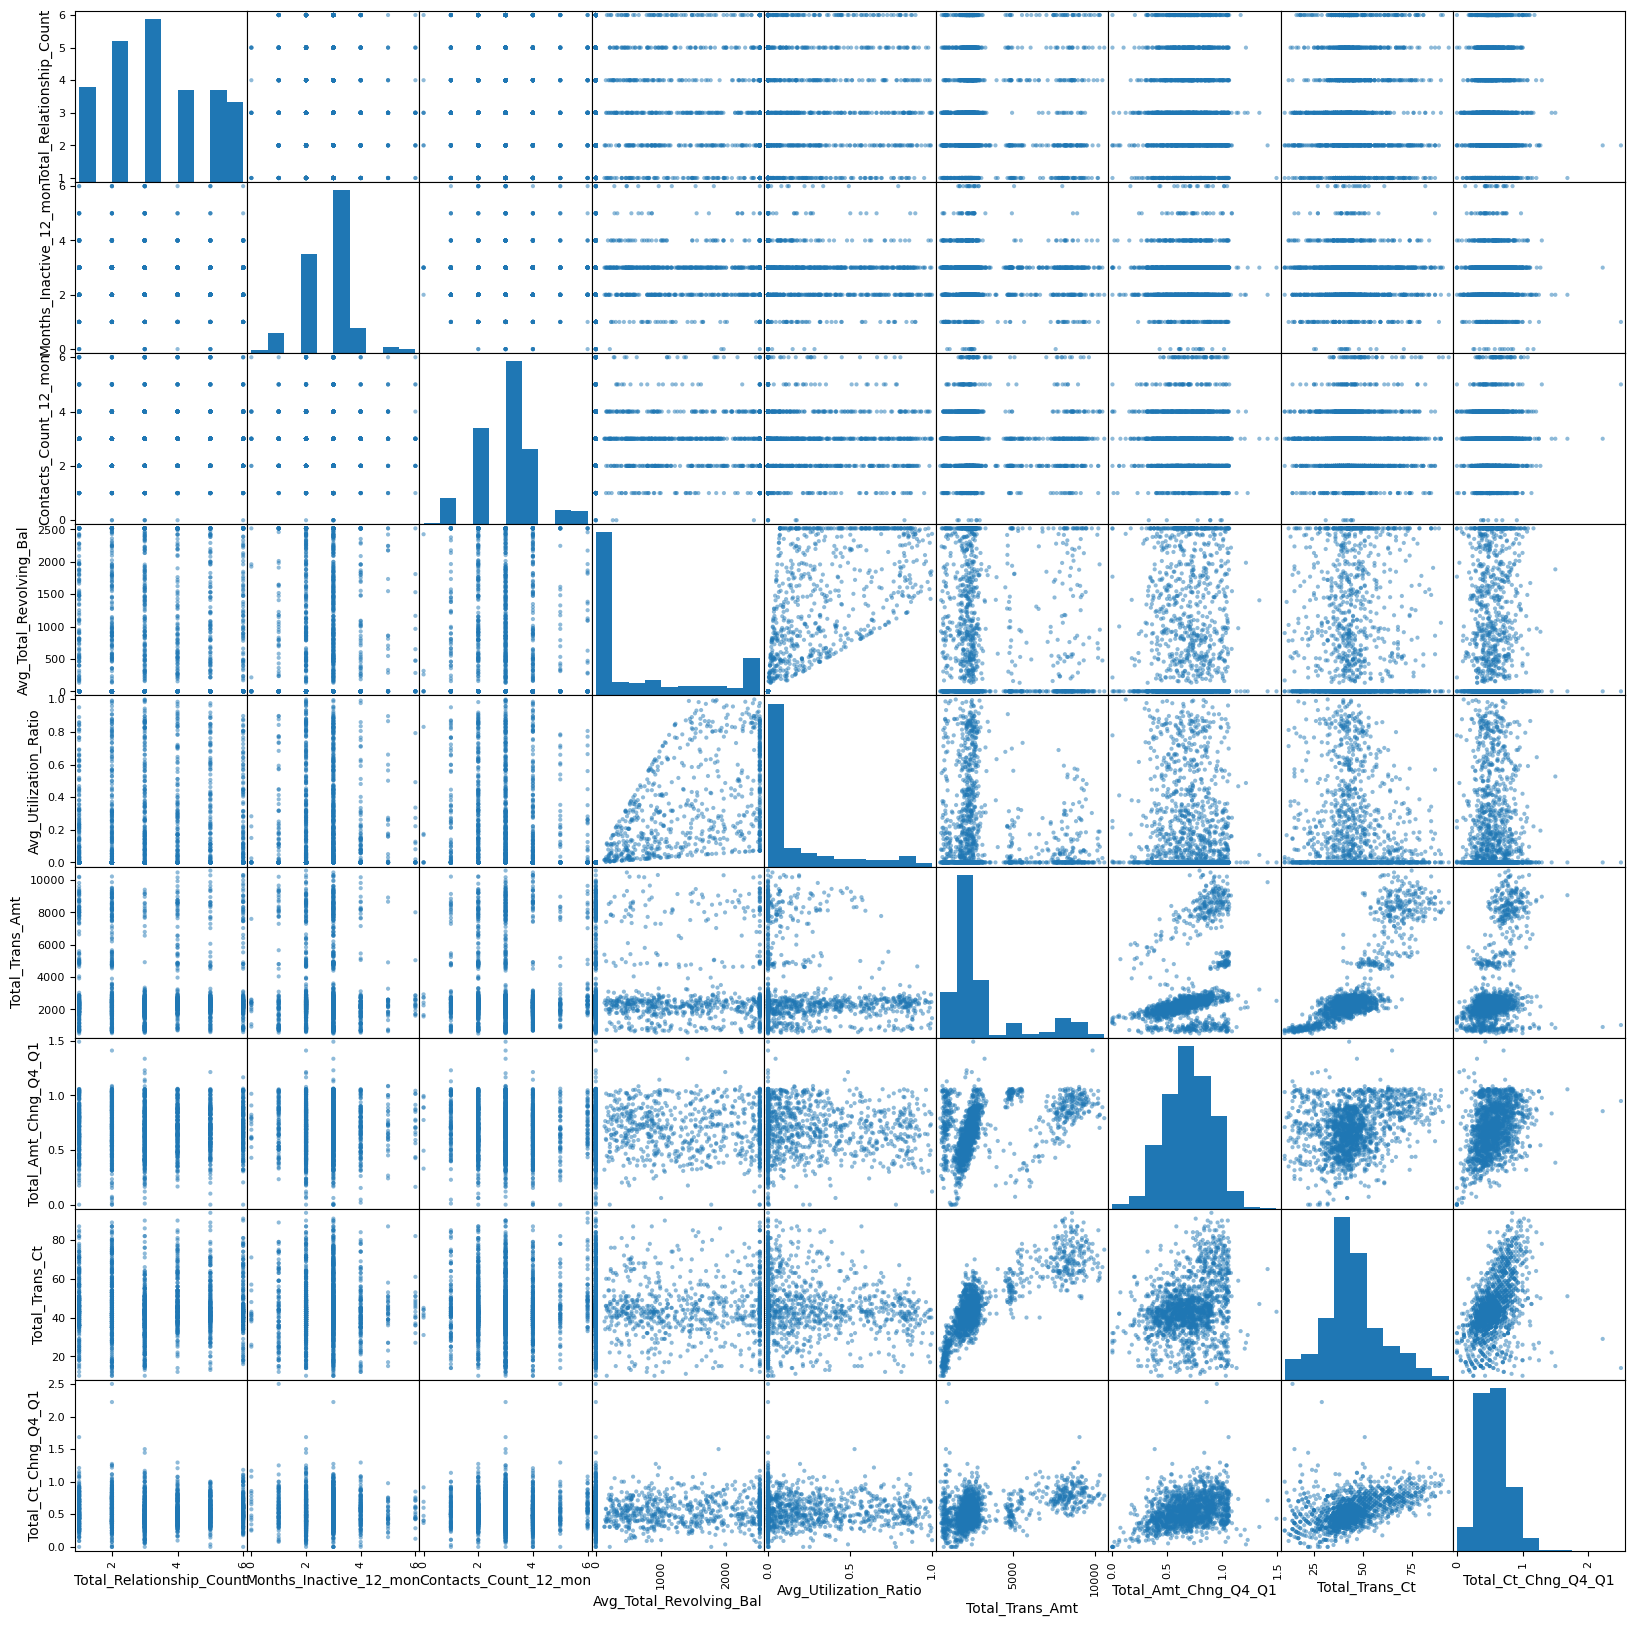

In [89]:
features = [
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Total_Revolving_Bal', 
            'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

pd.plotting.scatter_matrix(df1[features], figsize=(20,20));

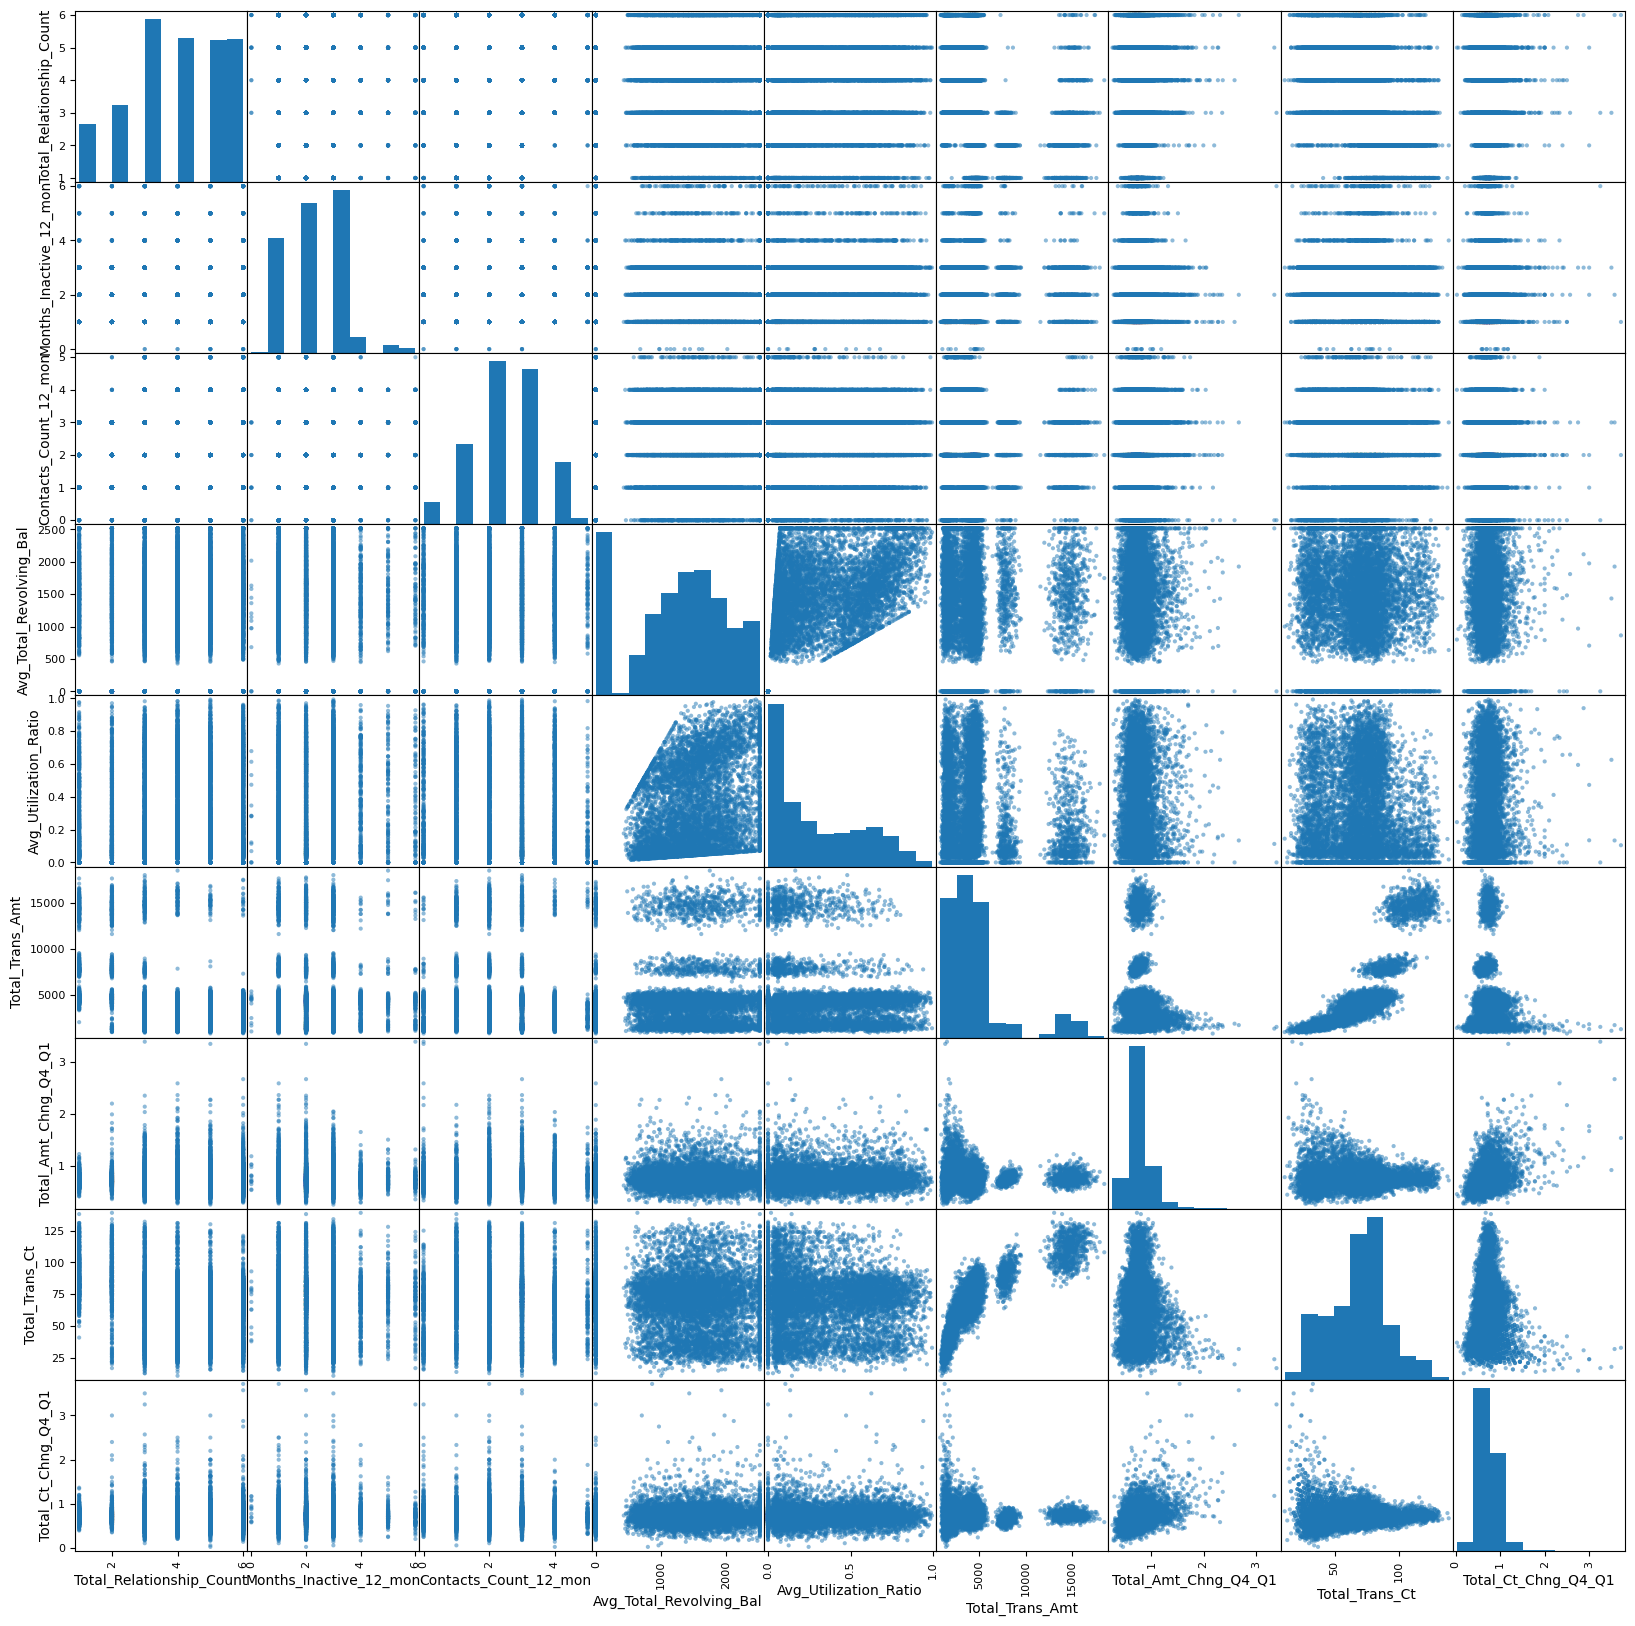

In [90]:
features = [
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Total_Revolving_Bal', 
            'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

pd.plotting.scatter_matrix(df0[features], figsize=(20,20));

#### Comments:

- There are no very visible correlations, other than those expected

Evaluating central trend indicators in relation to **Attrition_Flag**

In [87]:
df.groupby("Attrition_Flag").mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                  
0                  46.262118         2.335412       35.880588   
1                  46.659496         2.402581       36.178242   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
0                               3.914588                2.273765   
1                               3.279656                2.693301   

                Contacts_Count_12_mon  Credit_Limit  Avg_Total_Revolving_Bal  \
Attrition_Flag                                                                 
0                            2.356353   8726.864000              1256.604118   
1                            2.972342   8136.016595               672.822987   

                Avg_Utilization_Ratio  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                                 
0                            0.296412      4654.655882              0.772510   
1                            0.162475      3095.025814              0.694277   

                Increased_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                                  
0                               0.100118       68.672588             0.742434   
1                               0.087277       44.933620             0.554386   

                Increased_Ct_Chng_Q4_Q1  Purchase_Weight  
Attrition_Flag                                            
0                              0.073647        62.425049  
1                              0.025814        63.593123

In [98]:
df.groupby('Attrition_Flag')['Total_Relationship_Count'].describe()

count      mean       std  min  25%  50%  75%  max
Attrition_Flag                                                     
0               8500.0  3.914588  1.528949  1.0  3.0  4.0  5.0  6.0
1               1627.0  3.279656  1.577782  1.0  2.0  3.0  5.0  6.0

In [93]:
df.groupby('Attrition_Flag')['Months_Inactive_12_mon'].describe()

count      mean       std  min  25%  50%  75%  max
Attrition_Flag                                                     
0               8500.0  2.273765  1.016741  0.0  1.0  2.0  3.0  6.0
1               1627.0  2.693301  0.899623  0.0  2.0  3.0  3.0  6.0

In [99]:
df.groupby('Attrition_Flag')['Avg_Total_Revolving_Bal'].describe()

count         mean         std  min    25%     50%     75%  \
Attrition_Flag                                                                
0               8500.0  1256.604118  757.745354  0.0  800.0  1364.0  1807.0   
1               1627.0   672.822987  921.385582  0.0    0.0     0.0  1303.5   

                   max  
Attrition_Flag          
0               2517.0  
1               2517.0

In [100]:
df.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].describe()

count      mean       std  min    25%    50%      75%    max
Attrition_Flag                                                               
0               8500.0  0.296412  0.272568  0.0  0.055  0.211  0.52925  0.994
1               1627.0  0.162475  0.264458  0.0  0.000  0.000  0.23100  0.999

In [101]:
df.groupby('Attrition_Flag')['Total_Trans_Ct'].describe()

count       mean        std   min   25%   50%   75%    max
Attrition_Flag                                                             
0               8500.0  68.672588  22.919011  11.0  54.0  71.0  82.0  139.0
1               1627.0  44.933620  14.568429  10.0  37.0  43.0  51.0   94.0